<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Sep30/Ejercicio_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [329]:
def tetha_prop(tet_in1,tet_in2, sig):
  tet_p=np.zeros(2)
  tet_p[0]= np.random.normal(tet_in1,sig)
  tet_p[1]= np.random.normal(tet_in2,sig)
  return tet_p

In [328]:
def model(x,tetha):
  f=0
  for i in range(len(tetha)):
    f += tetha[i]*x**i
  return f

def likelihood(y,x,tetha):
  f=model(x,tetha)
  for i in range(len(np.array(y))):
    R=(y[i]-f[i])**2
    Ll=np.sum(R)
  return Ll

def prior(Tet_min0,Tet_min1,Tet_max0, Tet_max1,tet_prop):
  if Tet_max0 > tet_prop[0]  > Tet_min0 and Tet_max1 > tet_prop[1]  > Tet_min1:
    LPrior=0
  else:
    LPrior=-math.inf
  return LPrior

In [ ]:
def Post(prior, likelihood):
  Post = likelihood + prior
  return Post

In [ ]:
def Eval(N,y,x,tet_ini,sig,T_min0, T_max0, T_min1, T_max1):
  Tet_accept=[0,0]
  Tet_acc = np.array(Tet_accept)
  for i in range(N):
    Prop = tetha_prop(tet_ini[0],tet_ini[1],sig)
    if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop)) > Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)):
      Tet_acc = np.vstack((Tet_acc,Prop))
      tet_ini= Prop
    else:
      ptest=np.random.uniform(0,1)
      if Post(prior(T_min0,T_min1,T_max0,T_max1,Prop),likelihood(y,x,Prop))-Post(prior(T_min0,T_min1,T_max0,T_max1,tet_ini),likelihood(y,x,tet_ini)) > np.log(ptest):
        Tet_acc= np.vstack((Tet_acc,Prop))
        tet_ini= Prop
  return Tet_acc

In [ ]:
tetha_prop(tet_ini[0],tet_ini[1],sig)

array([-0.00855426, -0.00467281])

In [ ]:
data = np.loadtxt("olympic100m_men.txt",delimiter=',').T

In [ ]:
x=data[0]
y=data[1]

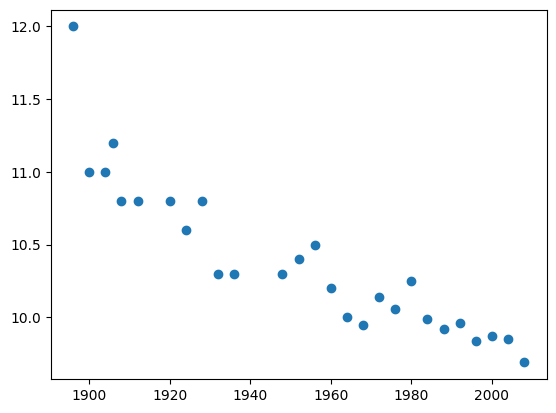

In [ ]:
plt.scatter(x,y)

In [ ]:
N=5000


In [330]:
tet_ini=np.array([0,0])
sig=0.04
T_min0, T_max0= -40,40
T_min1, T_max1= -40,40

In [331]:
Tethas = Eval(N,y,x,tet_ini,sig,T_min0, T_max0, T_min1, T_max1)

In [332]:
Graf = Tethas.T

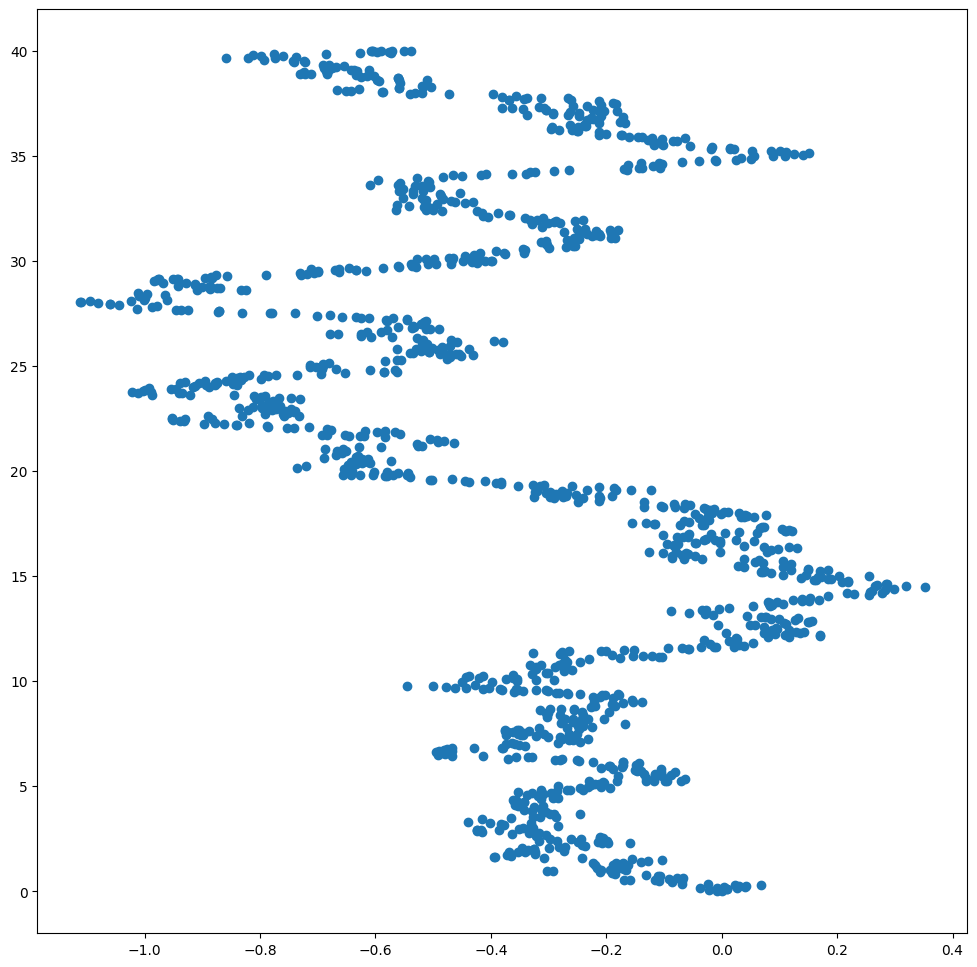

In [333]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.scatter(Graf[0],Graf[1])

(array([  9.,  42.,  55.,  60.,  79., 105., 113., 124., 206., 138.,  97.,
         87.,  79.,  18.,  13.]),
 array([-1.1124268 , -1.01477294, -0.91711908, -0.81946523, -0.72181137,
        -0.62415751, -0.52650366, -0.4288498 , -0.33119595, -0.23354209,
        -0.13588823, -0.03823438,  0.05941948,  0.15707334,  0.25472719,
         0.35238105]),
 <BarContainer object of 15 artists>)

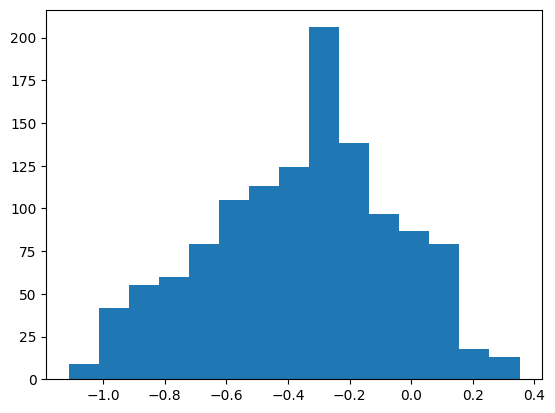

In [334]:
#Gráficos de W0
plt.hist(Graf[0],bins=15)

(array([46., 42., 35., 41., 41., 46., 34., 45., 41., 38., 34., 39., 43.,
        41., 53., 27., 42., 41., 47., 43., 39., 39., 52., 38., 34., 34.,
        41., 43., 37., 49.]),
 array([ 0.        ,  1.33333085,  2.6666617 ,  3.99999255,  5.3333234 ,
         6.66665425,  7.9999851 ,  9.33331595, 10.6666468 , 11.99997765,
        13.3333085 , 14.66663935, 15.9999702 , 17.33330105, 18.6666319 ,
        19.99996275, 21.3332936 , 22.66662445, 23.9999553 , 25.33328615,
        26.666617  , 27.99994785, 29.3332787 , 30.66660955, 31.9999404 ,
        33.33327125, 34.6666021 , 35.99993295, 37.3332638 , 38.66659465,
        39.9999255 ]),
 <BarContainer object of 30 artists>)

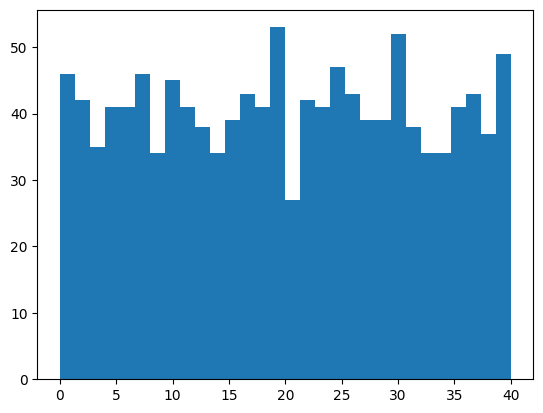

In [335]:
#Gráfico de W1
plt.hist(Graf[1],bins=30)

In [ ]:
Tethas

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.36400277e-03, -6.28728911e-03],
       [ 3.32507300e-03, -1.81752247e-02],
       ...,
       [-7.81295405e-01, -3.99998771e+01],
       [-7.76022225e-01, -3.99999061e+01],
       [-7.97007805e-01, -3.99999851e+01]])